In [1186]:
# load original data
import pandas as pd
import numpy as np
data = pd.read_csv('./data/americaData.csv')
data.head(10)

,index,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime
0,0,United States of America,971002,24632468,0,10845438,410378,2021/1/22 23:40
1,1,United States of America,971002,24632468,0,10845438,410378,2021/1/22 20:56
2,2,United States of America,971002,24632468,0,10845438,410378,2021/1/22 19:16
3,3,United States of America,971002,24632468,0,10845438,410378,2021/1/22 19:14
4,4,United States of America,971002,24619597,0,10845438,409877,2021/1/22 15:21
5,5,United States of America,971002,24619597,0,10845438,409877,2021/1/22 11:40
6,6,United States of America,971002,24619597,0,10845438,409877,2021/1/22 11:13
7,7,United States of America,971002,24432829,0,10562082,406001,2021/1/22 11:04
8,8,United States of America,971002,24432829,0,10562082,406001,2021/1/22 10:23
9,9,United States of America,971002,24432829,0,10562082,406001,2021/1/22 10:02


In [1187]:
# order the data by time
data['updateTime'] = pd.to_datetime(data['updateTime'])
data = data[::-1]
data.head(10)

,index,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,updateTime
2566,2566,United States of America,971002,5,0,0,0,2020-01-27 17:20:00
2565,2565,United States of America,971002,6,0,0,0,2020-01-31 07:17:00
2564,2564,United States of America,971002,6,0,0,0,2020-02-01 02:48:00
2563,2563,United States of America,971002,8,0,0,0,2020-02-02 07:41:00
2562,2562,United States of America,971002,9,0,0,0,2020-02-03 09:28:00
2561,2561,United States of America,971002,11,0,0,0,2020-02-04 07:11:00
2560,2560,United States of America,971002,12,0,0,0,2020-02-06 10:59:00
2559,2559,United States of America,971002,12,0,0,0,2020-02-10 14:08:00
2558,2558,United States of America,971002,12,0,0,0,2020-02-10 15:19:00
2557,2557,United States of America,971002,12,0,0,0,2020-02-10 15:27:00


In [1188]:
# fetch the columns we need
data = data[['updateTime', 'province_confirmedCount']]
data.reset_index(drop=True, inplace=True)
data.head(10)

,updateTime,province_confirmedCount
0,2020-01-27 17:20:00,5
1,2020-01-31 07:17:00,6
2,2020-02-01 02:48:00,6
3,2020-02-02 07:41:00,8
4,2020-02-03 09:28:00,9
5,2020-02-04 07:11:00,11
6,2020-02-06 10:59:00,12
7,2020-02-10 14:08:00,12
8,2020-02-10 15:19:00,12
9,2020-02-10 15:27:00,12


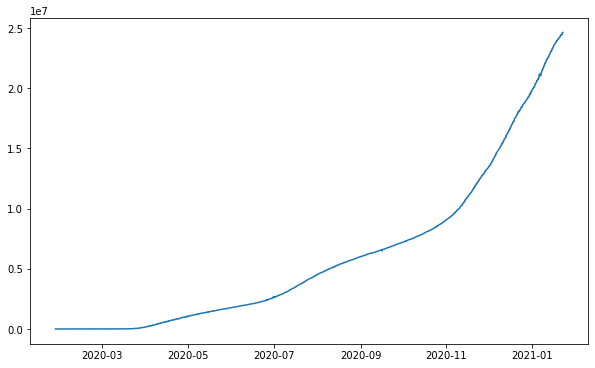

In [1189]:
# plot the total count trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['updateTime'], data['province_confirmedCount'])

In [1190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   updateTime               2567 non-null   datetime64[ns]
 1   province_confirmedCount  2567 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 40.2 KB


In [1191]:
# normalize the datetime field
data['updateTime'] = pd.to_datetime(data['updateTime']).dt.normalize()
data.head(10)

,updateTime,province_confirmedCount
0,2020-01-27,5
1,2020-01-31,6
2,2020-02-01,6
3,2020-02-02,8
4,2020-02-03,9
5,2020-02-04,11
6,2020-02-06,12
7,2020-02-10,12
8,2020-02-10,12
9,2020-02-10,12


In [1192]:
# group the data by date
data.columns = ['date', 'confirmedCount']
data_merge = data['confirmedCount'].groupby(data['date']).max()
data_merge = data_merge.to_frame()
data_merge.head(30)

,confirmedCount
date,
2020-01-27,5
2020-01-31,6
2020-02-01,6
2020-02-02,8
2020-02-03,9
2020-02-04,11
2020-02-06,12
2020-02-10,12
2020-02-11,13


In [1193]:
# calculate the diff between this date and the last date (new added count)
data_merge['lastDayConfirmedCount'] = data_merge['confirmedCount'].shift(1)
data_merge['diffCount'] = data_merge['confirmedCount'] - data_merge['lastDayConfirmedCount']
data_diff = data_merge[['diffCount']]
data_diff = data_diff.dropna(axis=0, how='any', subset=['diffCount'])
data_diff

,diffCount
date,
2020-01-31,1.0
2020-02-01,0.0
2020-02-02,2.0
2020-02-03,1.0
2020-02-04,2.0
...,...
2021-01-18,169786.0
2021-01-19,150130.0
2021-01-20,175511.0


In [1194]:
# do the data smoothing
data_diff_merge = data_diff
data_diff_merge.rename(columns={'diffCount':'0'}, inplace=True)
indexList = ['-3', '-2', '-1', '0', '1', '2', '3']
for i in range(7):
    data_diff_merge[indexList[i]] = data_diff_merge['0'].shift(i - 3)
data_diff_merge = data_diff_merge.dropna(axis=0, how='any')
data_diff_merge['avg'] = data_diff_merge.apply(lambda x:x.sum() / 7, axis=1)
data_diff = data_diff_merge[['avg']]
data_diff.rename(columns={'avg':'diffCount'}, inplace=True)
data_diff

<ipython-input-1194-540d8f70e505>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_diff_merge['avg'] = data_diff_merge.apply(lambda x:x.sum() / 7, axis=1)
E:\DevelopTools\Evironments\python\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,diffCount
date,
2020-02-03,1.000000
2020-02-04,1.000000
2020-02-06,1.000000
2020-02-10,0.857143
2020-02-11,0.857143
...,...
2021-01-15,217073.428571
2021-01-16,208671.714286
2021-01-17,201067.714286


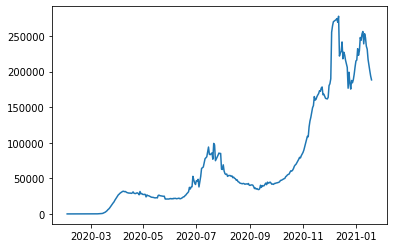

In [1195]:
plt.plot(data_diff)

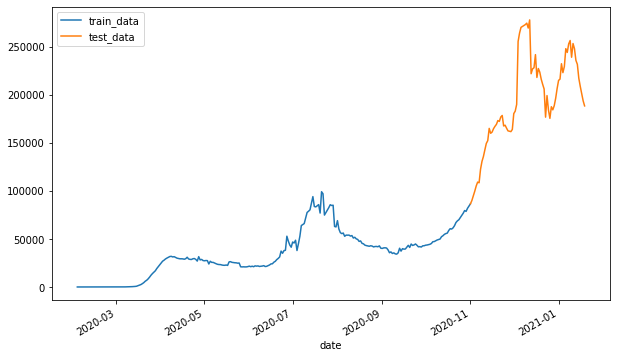

In [1196]:
# split training data and test data
split_date = pd.to_datetime('2020-11-01')
# split_date_1 = pd.to_datetime('2020-11-25')
# data = data_merge['confirmedCount']
data = data_diff['diffCount']
train_data = data.loc[:split_date]
test_data = data.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train_data.plot()
test_data.plot(ax=ax)
plt.legend(['train_data', 'test_data'])

In [1197]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_sc = scaler.fit_transform(train_data.to_frame())
test_sc = scaler.transform(test_data.to_frame())
test_sc

array([[0.87263641],
       [0.9071784 ],
       [0.95640316],
       [1.0052082 ],
       [1.05979404],
       [1.1011452 ],
       [1.09397545],
       [1.23558046],
       [1.3182698 ],
       [1.36991332],
       [1.43978625],
       [1.50696638],
       [1.53670114],
       [1.66483493],
       [1.61342362],
       [1.62627032],
       [1.6622229 ],
       [1.68681003],
       [1.7073284 ],
       [1.74724878],
       [1.73829345],
       [1.78444031],
       [1.80063462],
       [1.69047207],
       [1.69849422],
       [1.66774552],
       [1.6388949 ],
       [1.63522132],
       [1.63099534],
       [1.65390218],
       [1.82011452],
       [1.84602859],
       [1.91662268],
       [2.57756768],
       [2.66560657],
       [2.72564003],
       [2.75483103],
       [2.76995947],
       [2.71846595],
       [2.80386396],
       [2.23909971],
       [2.28992832],
       [2.30187934],
       [2.43938096],
       [2.19990192],
       [2.29365814],
       [2.255082  ],
       [2.180

In [1198]:
# get train & test data
def getXYSequence(dataset, window_size):
    dataX, dataY = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i : (i + window_size)]
        dataX.append(a)
        dataY.append(dataset[i + window_size])

    return np.array(dataX), np.array(dataY)
window_size = 5
X_train, y_train = getXYSequence(train_sc, window_size)
X_test, y_test = getXYSequence(test_sc, window_size)

In [1199]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(254, 5, 1) (254, 1) (72, 5, 1) (72, 1)


In [1200]:
X_train[0]

array([[7.21157313e-06],
       [7.21157313e-06],
       [7.21157313e-06],
       [5.76925851e-06],
       [5.76925851e-06]])

In [1201]:
# create lstm model and train
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(window_size, X_train.shape[2]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
# es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20, min_delta=0.00001)
lstm_model.fit(X_train, y_train, validation_split=0.15, epochs=200, batch_size=10, verbose=1, shuffle=True)

00
22/22 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 10/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 11/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 12/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 13/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 14/200
22/22 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 15/200
22/22 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 16/200


In [1202]:
# lstm test dataset evaluate mse
lstm_test_mse = lstm_model.evaluate(X_test, y_test, batch_size=10)
print(lstm_test_mse)

8/8 [==============================] - 0s 715us/step - loss: 0.0277
0.027684073895215988


In [1203]:
# prediction result
lstm_y_predict = lstm_model.predict(X_test)
# lstm_y_train_predict = lstm_model.predict(X_train)
lstm_y_predict = scaler.inverse_transform(lstm_y_predict)
lstm_y_predict
# lstm_y_train_predict = scaler.inverse_transform(lstm_y_train_predict)

array([[100592.  ],
       [104899.69],
       [105201.32],
       [116908.51],
       [125280.17],
       [130917.06],
       [137746.33],
       [144353.61],
       [147635.83],
       [159204.61],
       [155493.28],
       [156721.28],
       [159924.17],
       [162207.03],
       [164162.75],
       [167809.38],
       [167197.14],
       [171328.05],
       [172863.23],
       [163315.17],
       [163806.69],
       [160913.27],
       [158221.48],
       [157755.48],
       [157289.69],
       [159255.95],
       [173932.78],
       [176620.19],
       [183184.42],
       [240470.84],
       [245799.25],
       [251845.05],
       [254279.06],
       [255481.6 ],
       [251241.4 ],
       [258560.73],
       [211024.3 ],
       [217348.  ],
       [217545.89],
       [229205.69],
       [208423.1 ],
       [217268.22],
       [213362.1 ],
       [207088.34],
       [202567.94],
       [198274.81],
       [172137.25],
       [192407.16],
       [178466.39],
       [170753.47],


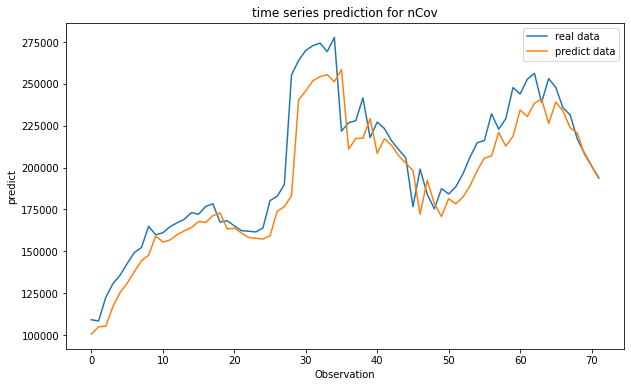

In [1204]:
real_y_test = scaler.inverse_transform(y_test)
# real_y_train = scaler.inverse_transform(y_train)
plt.figure(figsize=(10, 6))
# axreal = plt.plot(real_y_train, label='real data')
# axpredict = plt.plot(lstm_y_train_predict, label='predict data')
plt.plot(real_y_test, label='real data')
plt.plot(lstm_y_predict, label='predict data')
plt.title('time series prediction for nCov')
plt.xlabel('Observation')
plt.ylabel('predict')
plt.legend()
plt.show()